In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from itertools import combinations
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.spatial import Voronoi, voronoi_plot_2d
import warnings
warnings.filterwarnings("ignore")

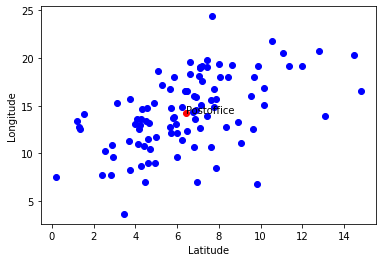

In [10]:
# Generating random points for locations
cov = np.array([[3, 7], [7, 3]])
mean_1 = [5, 10]
mean_2 = [6, 14]
mean_3 = [8, 17]

x_class1 = np.random.multivariate_normal(mean_1, cov, 20)
x_class2 = np.random.multivariate_normal(mean_2, cov, 40)
x_class3 = np.random.multivariate_normal(mean_3, cov, 40)

data = np.append(x_class1 , np.append(x_class2 ,x_class3, axis=0), axis=0)
data = np.append(data,np.array([data.mean(axis=0)[0],data.mean(axis=0)[1]]).reshape(-1,2), axis=0)

# Plotting delivery locations
plt.scatter(data[:-1,0],data[:-1,1], c="blue")
plt.scatter(data[-1,0],data[-1,1], c="red")
plt.annotate('Postoffice', xy =(data.mean(axis=0)[0], data.mean(axis=0)[1]))
plt.xlabel("Latitude")
plt.ylabel("Longitude")

plt.show()

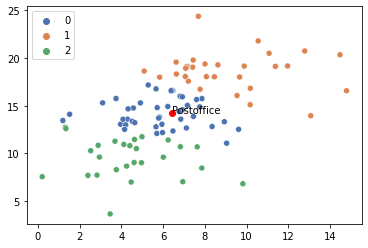

In [11]:
# Applying K-means clustering to classify data into 3 clusters
kmeans = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)

kmeans.fit(data[:-1,:])

# Plotting locations with clusters
sns.scatterplot(data[:-1,0],data[:-1,1], hue=kmeans.labels_, palette="deep")
plt.scatter(data[-1,0],data[-1,1], c="red")
plt.annotate('Postoffice', xy =(data.mean(axis=0)[0], data.mean(axis=0)[1]))
plt.show()

In [12]:
# Creating complete dataframe with locations and address names
df = pd.DataFrame(columns = ['Lat', 'Long', 'Cluster', 'Address'])
for i in range(data[:-1,:].shape[0]):
    df = df.append({'Lat' : data[i,0], 'Long' : data[i,1], 'Cluster' : kmeans.labels_[i], 'Address' : 'A'+str(i)}, ignore_index = True)

In [13]:
# Selecting one cluster
df_1 = df[df.loc[:,'Cluster'] == 0]
df_postoffice = pd.DataFrame({'Lat' : data[-1,0], 'Long' : data[-1,1], 'Cluster' : '', 'Address' : 'Postoffice'}, index=[0])
df_1 = df_postoffice.append(df_1, ignore_index = True)

In [14]:
# Generating Voronoi
vor = Voronoi(df_1.iloc[:,:2])

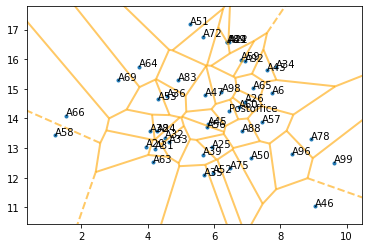

In [15]:
# Plotting Voronoi
fig = voronoi_plot_2d(vor, show_vertices=False, line_colors='orange',
                line_width=2, line_alpha=0.6, point_size=6)

for i in range(df_1.shape[0]):
    plt.annotate(df_1.iloc[i,3], xy =(df_1.iloc[i,0], df_1.iloc[i,1]))
plt.show()

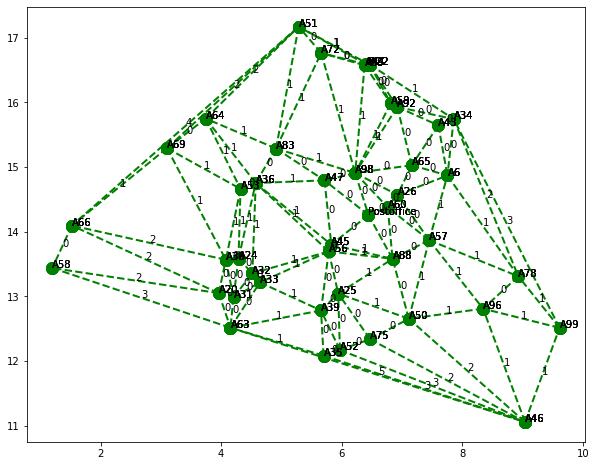

In [16]:
# Generating graph from Voronoi for neighrest nodes
plt.figure(figsize=(10, 8))

for x in vor.ridge_points:
    plt.plot(df_1.iloc[[x[0],x[1]],0], df_1.iloc[[x[0],x[1]],1], color='green', marker='o', linestyle='dashed',
     linewidth=2, markersize=12)
    dist = np.sqrt(np.square(df_1.iloc[x[0],0]-df_1.iloc[x[1],0]) + np.square(df_1.iloc[x[0],1]-df_1.iloc[x[1],1]))
    plt.annotate(int(dist), xy =(df_1.iloc[[x[0],x[1]],0].mean(), df_1.iloc[[x[0],x[1]],1].mean()))
    plt.annotate(df_1.iloc[x[0],3], xy =(df_1.iloc[x[0],0], df_1.iloc[x[0],1]))
    plt.annotate(df_1.iloc[x[1],3], xy =(df_1.iloc[x[1],0], df_1.iloc[x[1],1]))
    
plt.show()

### Now STRATEGY2 algorithm can be used considering only neighbouring nodes for each current node